# Estabilidade Numérica para o Método de Euler

A seguir, aplicaremos um resultado derivado do contexto da estabilidade teórica do PVI ao método de Euler e estudar alguns aspectos de sua estabilidade numérica.

Definamos uma solução numérica $\{z_n\}$ tal que 

$$z_{n+1} = z_n + h f(t_n,z_n), \quad n = 0,1,\ldots,N(h)-1, \qquad z_0 = y_0 + \epsilon.$$

De modo análogo ao que sabemos para o PVI, usamos uma condição inicial perturbada para verificar que $\{z_n\}$ comporta-se como uma segunda solução $\{ y_n \}$ à medida que $h \to 0$. 

Tomemos o erro $e_n = z_n - y_n, \quad n \geq 0$. Então, $e_0 = \epsilon$. Subtraindo $y_{n+1} = y_n + h f(t_n,y_n)$ da anterior, obtemos

$$e_{n+1} = e_n + h [ f(t_n,z_n) - f(t_n,y_n).$$

Isto tem exatamente o mesmo formato que o erro total para o método de Euler considerando nulo o erro de truncamento. A partir do teorema do limite do erro, podemos concluir que (consultar demonstração): 

$$\max_{0 \leq n \leq N(h)} |z_n - y_n| \leq e^{(b-t_0)K}|\epsilon| \leq \kappa |\epsilon|,$$

para uma constante $\kappa \geq 0$. Vale relembrar que $K$ é a constante de Lipschitz. Este resultado diz-nos que, ressalvadas as condições teóricas do PVI, a estabilidade numérica do método é encontrada. 

## Notas sobre análise de estabilidade 

Consideremos o PVI

$$\begin{cases}
y'(t) = -100y(t)\\
y(0) = y_0
\end{cases}$$

cuja solução analítica é $y(t) = y_0e^{-100t}$. Se $y_0 > 0$, a solução é positiva e decai rapidamente com $t \to \infty$. Se o método de Euler explícito for aplicado a este PVI, teremos 

$$w_{n+1} = (1 - 100h)w_n.$$

Com um passo $h = 0.1$, a aproximação numérica $w_{n+1} = -9w_n$ cresce de acordo com $w_n = (-9)^n w_0$ e oscilla com uma amplitude crescente sem, de fato, aproximar a solução verdadeira. Ao se reduzir o passo para $h = 0.001$, a solução numérica transforma-se para  $w_{n+1} = 0.9w_n$, de modo que $w_n = 0.9^n w_0$ significa um decaimento suave.

Reutilizemos nosso código do método de Euler para realizar este teste numérico.

In [1]:
from numpy import *

def euler_expl(t0,tf,y0,h,fun):
    """
    Resolve o PVI y' = f(t,y), t0 <= t <= tf, y(t0) = y0
    com passo h usando o metodo de Euler explicito. 
    
    Entrada: 
        t0  - tempo inicial
        tf  - tempo final 
        y0  - condicao inicial 
        h   - passo 
        fun - funcao f(t,y) (anonima)
        
    Saida:
        t   - nos da malha numerica 
        y   - solucao aproximada
    """
    
    n = round((tf - t0)/h + 1)
    t = linspace(t0,t0+(n-1)*h,n)
    y = linspace(t0,t0+(n-1)*h,n)
    y = zeros((n,))
    
    y[0] = y0

    for i in range(1,n):
        y[i] = y[i-1] + h*f(t[i-1],y[i-1])

    return (t,y)

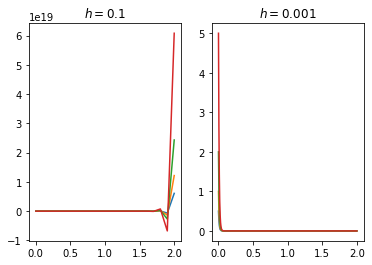

In [2]:
import matplotlib.pyplot as plt
f = lambda t,y: -100*y

# h = 0.1
plt.subplot(121)
for y0 in [0.5,1,2,5]:
    (t,ynum) = euler_expl(0,2,y0,0.1,f)    
    plt.plot(t,ynum)
    plt.title('$h=0.1$')

# h = 0.001
plt.subplot(122)    
for y0 in [0.5,1,2,5]:
    (t,ynum) = euler_expl(0,2,y0,0.001,f)    
    plt.plot(t,ynum)
    plt.title('$h=0.001$')



**Exercício:** Repita o mesmo experimento numérico anterior para o PVI 

$$\begin{cases}
y'(t) = \lambda(y - \textrm{sen}(t)) + \cos(t) \\
y(\pi/4) = 1/2
\end{cases}$$

para $\lambda = 2$ e $\lambda = - 0.2$. Compare as soluções numéricas obtidas pelo método de Euler para $h = \pi/10$ e $h = \pi/20$ para cada valor de $\lambda$.


### Região de estabilidade 

Considere o PVI mais geral 

$$\begin{cases}
y'(t) = \lambda y(t)\\
y(0) = y_0
\end{cases},$$

em que $\lambda \in \mathbb{C}$. A EDO teste é estável, i.e. a taxa de crescimento da perturbação é limitada quando $\Re\{\lambda\} = \alpha < 0$. Neste, a solução numérica pelo método de Euler explícito corresponde ao processo

$$w_{n+1} = (1 + h\lambda)w_n$$

e a solução numérica será estável se, e somente se, o _fator de amplificação_ for limitado por 1, ou seja, 

$$|1 + h\lambda| \leq 1.$$

Assim, diz-se que o método de Euler será **estável** para esta EDO teste para valores de $h$ que satisfizerem a condição acima (para $\lambda$ real e negativo, $h \leq -2/\lambda$). O conjunto 

$$\mathcal{S} = \{ h \lambda \in \mathbb{C}; |1 + h\lambda| \leq 1 \}$$

é chamado de _região de estabilidade_ para o método de Euler e trata-se de um disco de raio unitário centrado em $(-1,0)$ no plano de Argand-Gauss. 